In [110]:
#1 importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score

In [111]:
#2 transformando csv em tabela
df = pd.read_csv('monthly-sunspots.csv')
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7


In [112]:
#3 transformando coluna Date em data e criando coluna mes e ano
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number,Year,Month
0,0,1749-01-31,96.7,1749,1
1,1,1749-02-28,104.3,1749,2
2,2,1749-03-31,116.7,1749,3
3,3,1749-04-30,92.8,1749,4
4,4,1749-05-31,141.7,1749,5


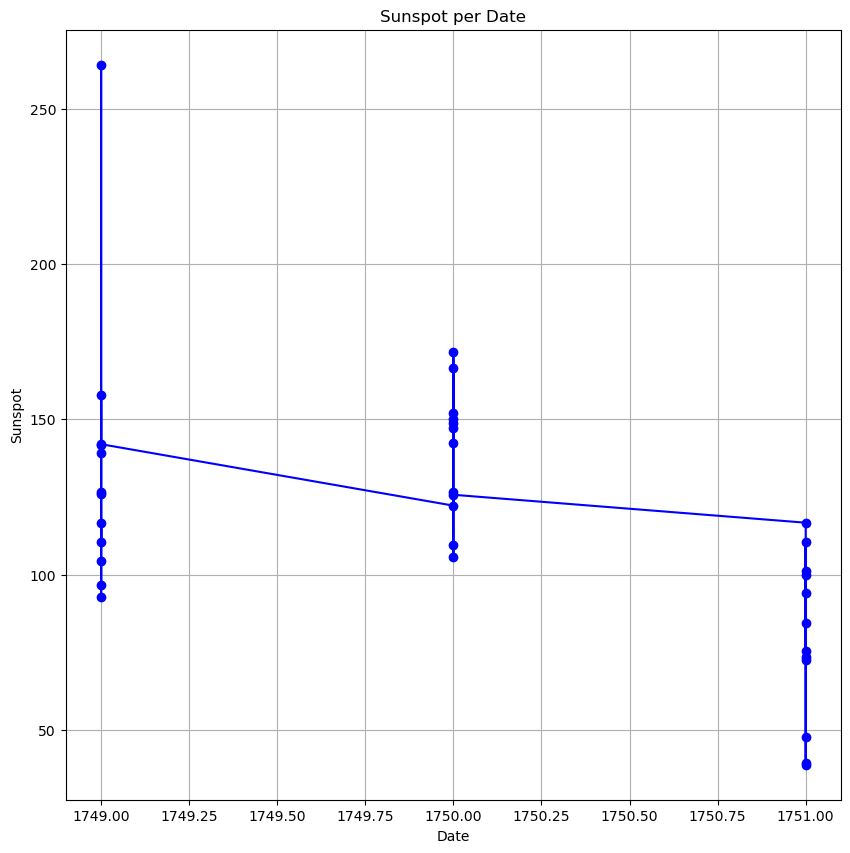

In [113]:
# analisando dados

data_lim = df.head(36)
plt.figure(figsize=(10, 10))
plt.plot(data_lim['Year'], data_lim['Monthly Mean Total Sunspot Number'], marker='o', linestyle='-', color='b')
plt.title('Sunspot per Date')
plt.xlabel('Date')
plt.ylabel('Sunspot')
plt.grid('True')
plt.show()

In [114]:
# dividindo base de treino e teste
test_data = df[(df['Date'].dt.year >= 2010) & (df['Date'].dt.year <= 2019)]
train_data = df[(df['Date'].dt.year >= 1749) & (df['Date'].dt.year <= 2009)]

In [115]:
# definindo modelos e dados

X = train_data[['Year', 'Month']]
Y = train_data['Monthly Mean Total Sunspot Number']
Y_t = np.log1p(Y_train)
X_test = test_data[['Year', 'Month']]
Y_test = test_data['Monthly Mean Total Sunspot Number']
Y_test_t = np.log1p(Y_test)
model = LinearRegression()
errors = []

In [116]:
# validacao cruzada k-fold
for k in range(1, 25):
    if k == 1:
        X_train, X_validation = X[:-1], X[-1:] #separa dados de treino e validacao
        Y_train, Y_validation = Y[:-1], Y[-1:] #separa dados de treino e validacao
        model.fit(X_train, Y_train) #treina o modelo
        Y_pred = model.predict(X_validation) #prediz o valor de Y
        Y_pred_original = np.expm1(Y_pred)
        rmse = np.sqrt(mean_squared_error(Y_validation, Y_pred_original)) #rmse
        errors.append(rmse)
    else:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        mse_scores = cross_val_score(model, X, Y, cv=kf, scoring='neg_mean_squared_error')
        rmse_scores = np.sqrt(-mse_scores)
        rmse = np.mean(rmse_scores)
        errors.append(rmse)

In [117]:
# plotar grafico
print(errors)

[3.4686805358474457e+40, 68.2852657316557, 68.28829029201641, 68.28582774605118, 68.28798382162798, 68.28974345100649, 68.24362497851864, 68.24664404842534, 68.25042554117839, 68.27518070242726, 68.23194835529893, 68.27621366609367, 68.20468809023649, 68.23069726343951, 68.20308718237136, 68.18883610899088, 68.21695105678563, 68.20773516301493, 68.21699560402492, 68.202572989814, 68.18733286659469, 68.2075911744573, 68.15498074902192, 68.1886911786603]


In [118]:
# Determinar o melhor valor de K (menor RMSE)
best_k = np.argmin(errors) + 1
print(f"O melhor valor de K é: {best_k}")

O melhor valor de K é: 23


In [119]:
X_test = test_data[['Year', 'Month']]
kf = KFold(n_splits=best_k)
model.fit(X_train, Y_train)
y_pred_test = model.predict(X_test)
Y_pred = np.expm1(y_pred_test)
final_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE final nos dados de teste: {final_rmse}")

RMSE final nos dados de teste: 2.582407821390617e+40
